In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
from joblib import dump, load

from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [2]:
# Algorithm
# ---------
# load train and test set from dataset
# find descriptor for train data
# K-means descroptor into culsters
# Create train Histogram vector as Bag of Features
# scale the train data
# Train the Support Vector Classifier
# load the test data
# BoF test data
# scale test data
# test the data by the SVC
# Evaluate the the performance

# Load the Datasets


reading hotdogimage:
1.hotdog_-_evan_swigart.jpg 10.hotdog-termasuk-dalam-6-makanan-paling-berbahaya-di-dunia-at6oqe9tqv.jpg 11.germanvegetariansausage.jpg 12.hotdog-royalty-free-image-185123377-1562609410.jpg 14.hotdog-59642bf70f61450dd906ad92.jpg 15.2.jpg 16.ristet-hotdog-5-of-7.jpg 17.hotdogg-5964764d83c1e62953732352.jpg 18._107799189_p07fqj0w.jpg 19.4279917464.jpg 2.1e7f18e4-5b25-4f79-8d9a-e3af2bea8560_169.jpeg 20.homemade-hotdog-buns-thumbnail.jpeg 21.chicken%20fillet%20hotdog.jpg 22.asal-usul-hot-dog-persaingan-2-toko-dalam-sejarah-makanan-amerika-btsqzzlsqn.jpg 23.hotdog.jpg 24.fed6c814-9c0a-48a3-9096-ca0d3e0daa36.jpg 25.hotdog_0601_20180106_105119.jpg 26.crispy-smoked-beef-hotdog.jpg 27.antara-hamburger-dan-hotdog-mana-yang-lebih-beracun-k5tdrf0wn4.jpg 28.hot-dog-ekonomis-foto-resep-utama.jpg 29.6b30fc27-eb2e-4998-9fb8-14b63dfeec9b_43.jpeg 3.hot-dog-mini-480x259-1200x720.jpg 30.67379157_1c7451da-d61b-42c0-a66c-1e1f29ca8197_305_305.jpg 31.d0223becbbc32aa1c037ad8216b61ede.jpg 32

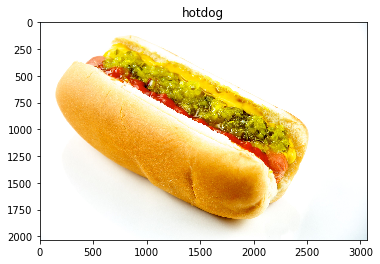

number train image	: 155
number test image	: 40
Classes	:['pizza', 'poutine', 'hotdog']


In [3]:
dataset_path = 'hotdog_dataset'
train_path = dataset_path + '/train'
test_path = dataset_path + '/test'

def load_dataset(path):
    """
    recieve path of dataset and then return images and its label in tuple
    """
    class_list = os.listdir(path)
    img_list = []
    label_list = []
    
    for clas in class_list:
        class_path = path + '/' + clas
        img_names = os.listdir(class_path)
        print("\nreading " + clas + 'image:')
        
        for img_name in img_names:
            img_path = class_path + '/' +img_name
            
            img = cv2.imread(img_path)
            print(img_name, end=" ")
            img_list.append(img)
            label_list.append(clas)
    return img_list, label_list

train_data, train_label = load_dataset(train_path)
test_data, test_label = load_dataset(test_path)

# check whether data is retrieved
plt.imshow(
    cv2.cvtColor(train_data[0], cv2.COLOR_BGR2RGB)
)
plt.title(train_label[0])
plt.show()

# shuffle data order
c = list(zip(train_data, train_label))
random.shuffle(c)
train_data, train_label = zip(*c)

c = list(zip(test_data, test_label))
random.shuffle(c)
test_data, test_label = zip(*c)

print(f'number train image\t: {len(train_data)}')
print(f'number test image\t: {len(test_data)}')
print('Classes', end='\t:')
print(list(set(train_label)))

# Find descriptor using SIFT

In [4]:
def get_image_descriptors(images):
    """
    receive a list of images and return list of image's descriptors
    """
    sift = cv2.xfeatures2d.SIFT_create(contrastThreshold=0.09)
    desc_list = []
    for row, image in enumerate(images):
        if((row+1) % 10 == 0):
            print(f'reading {row+1} images')
            
        _, descriptors = sift.detectAndCompute(image, None)
        desc_list.append(descriptors)
    return desc_list

train_descriptors = get_image_descriptors(train_data)
print(len(train_descriptors))

reading 10 images
reading 20 images
reading 30 images
reading 40 images
reading 50 images
reading 60 images
reading 70 images
reading 80 images
reading 90 images
reading 100 images
reading 110 images
reading 120 images
reading 130 images
reading 140 images
reading 150 images
155


# K-means all features to make Bag of Features

In [5]:
vector_length = 150
kmean = KMeans(n_clusters=vector_length, verbose=1, max_iter=100, n_init=2)
descriptor_list = np.vstack(train_descriptors)
# kmean.fit(X = descriptor_list)
# dump(kmean, 'Kmean-model1.joblib')
kmean = load('Kmean-model1.joblib')

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 22032697000.0
start iteration
done sorting
end inner loop
Iteration 1, inertia 21176148000.0
start iteration
done sorting
end inner loop
Iteration 2, inertia 20958677000.0
start iteration
done sorting
end inner loop
Iteration 3, inertia 20852146000.0
start iteration
done sorting
end inner loop
Iteration 4, inertia 20785336000.0
start iteration
done sorting
end inner loop
Iteration 5, inertia 20738085000.0
start iteration
done sorting
end inner loop
Iteration 6, inertia 20702370000.0
start iteration
done sorting
end inner loop
Iteration 7, inertia 20674270000.0
start iteration
done sorting
end inner loop
Iteration 8, inertia 20651526000.0
start iteration
done sorting
end inner loop
Iteration 9, inertia 20633383000.0
start iteration
done sorting
end inner loop
Iteration 10, inertia 20617865000.0
start iteration
done sorting
end inner loop
Iteration 11, inertia 20604176000.0
start iteration
done sorti

end inner loop
Iteration 2, inertia 20948916000.0
start iteration
done sorting
end inner loop
Iteration 3, inertia 20838961000.0
start iteration
done sorting
end inner loop
Iteration 4, inertia 20766720000.0
start iteration
done sorting
end inner loop
Iteration 5, inertia 20715840000.0
start iteration
done sorting
end inner loop
Iteration 6, inertia 20677851000.0
start iteration
done sorting
end inner loop
Iteration 7, inertia 20648575000.0
start iteration
done sorting
end inner loop
Iteration 8, inertia 20625533000.0
start iteration
done sorting
end inner loop
Iteration 9, inertia 20607334000.0
start iteration
done sorting
end inner loop
Iteration 10, inertia 20592650000.0
start iteration
done sorting
end inner loop
Iteration 11, inertia 20580660000.0
start iteration
done sorting
end inner loop
Iteration 12, inertia 20570608000.0
start iteration
done sorting
end inner loop
Iteration 13, inertia 20562050000.0
start iteration
done sorting
end inner loop
Iteration 14, inertia 20554600000

In [6]:
# save the model, it trains so long!
from joblib import dump, load
# dump(kmean, 'Kmean-model1.joblib')
kmean = load('Kmean-model1.joblib')

['Kmean-model1.joblib']

# Making Bag of words

In [7]:
def get_bof_img(img_descriptors, kmean, vector_length):
    bog = np.zeros(vector_length)
    for desc in img_descriptors:
        cluster_id = kmean.predict([desc])
        bog[cluster_id] += 1
    return bog

img_bof_list = [get_bof_img(img_desc, kmean, vector_length) for img_desc in train_descriptors]

# Train our Classifier

In [8]:
encoder = OrdinalEncoder()
category_train_label = encoder.fit_transform([[x] for x in train_label])

scaler = StandardScaler()
scaled_bog_img = scaler.fit_transform(img_bof_list)

svc = SVC()
svc.fit(scaled_bog_img, category_train_label)

C:\Users\Nabeel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Same Preprocess for our Test Dataset

In [9]:
category_test_label = encoder.fit_transform([[x] for x in test_label])

test_descriptors = get_image_descriptors(test_data)
bog_test_list = [get_bof_img(img_descriptors, kmean, vector_length) for img_descriptors in test_descriptors]
scaled_test_bog = scaler.transform(bog_test_list)

reading 10 images
reading 20 images
reading 30 images
reading 40 images


# Visualize our prediction

C:\Users\Nabeel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 39 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


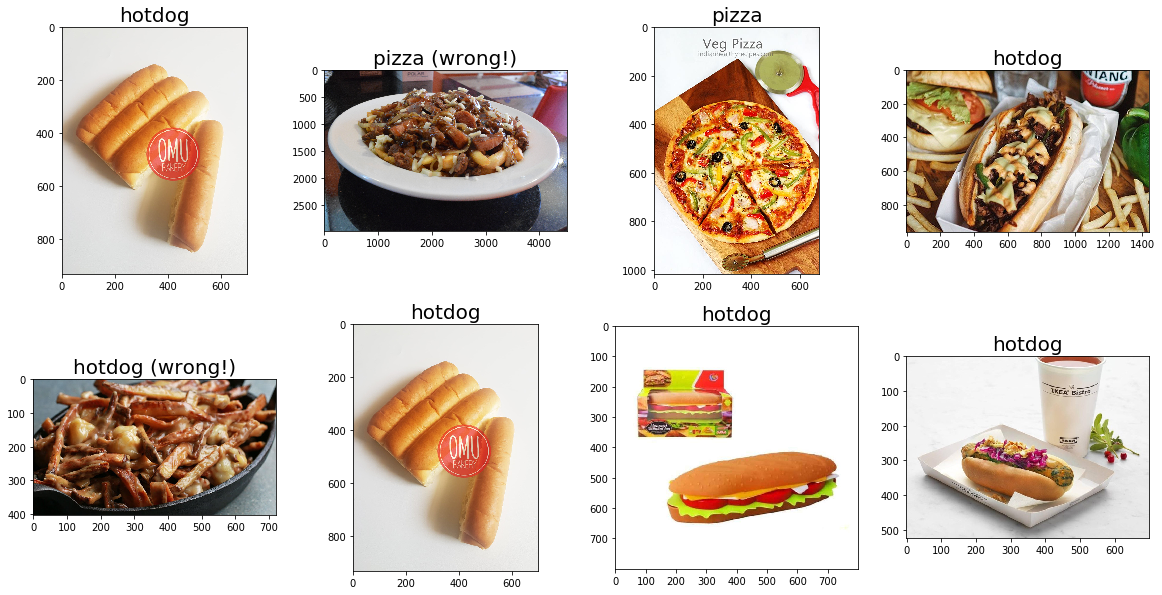

In [18]:
# get our random index
n_test = 8
random_idx = np.random.random_integers(size=n_test, low = 0, high = len(test_data)-1)

vis_test_data = np.array(scaled_test_bog)[random_idx]
vis_test_label = np.array(category_test_label)[random_idx]
vis_test_img = np.array(test_data)[random_idx]

plt.figure(figsize=(20,10))
for row, (img, data, label) in enumerate(zip(vis_test_img, vis_test_data, vis_test_label)):
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2,4,row+1)
    
    class_prediction = svc.predict([data])
    label_prediction = encoder.inverse_transform([class_prediction])
    
    title = label_prediction[0][0]
    if class_prediction != label:
        title += " (wrong!)"
        
    plt.title(title, fontdict = {'fontsize' : 20})
    plt.imshow(rgb_img)
plt.show()

# Evaluate our Support Vector Classification model

In [11]:
from sklearn.metrics import accuracy_score, recall_score

prediction = svc.predict(scaled_test_bog)

accuracy = accuracy_score(category_test_label, prediction)
# recall = recall_score(category_test_label, prediction)

# print(f"Accuracy\t: {accuracy}\nRecall\t\t: {recall}")
print(f"Accuracy\t: {accuracy}")

Accuracy	: 0.575
